In [1]:
import pandas as pd
import researchpy as rp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ants = {'nothing': [], 'vinegar': [], 'corn': [], 'mint': []}
# Creating dataframes/tables out of the data for each of the 10 clips for each of the 4 categories
for i in range(1,11):
    for key in ants:
        ants[key].append(pd.read_csv('csvs/' + key + str(i) + '.csv'))

In [3]:
for key in ants:
    for i in range(10):
        for col in ants[key][i].columns[1:]:
            # Scaling pixels to meter distances
            ants[key][i][col] = ants[key][i][col] * .2032 / 845.2
        

In [4]:
#Calculating total distance and velocity for each sample by computing euclidean distances using corresponding X/Y data 
for key in ants:
    for i in range(10):
        for col in ants[key][i].columns[1:]:
            # Scaling pixels to meter distances
            curr_table = ants[key][i]
            curr_table['Distance'] = np.sqrt(np.square(curr_table['VideoAnalysis: X']) + np.square(curr_table['VideoAnalysis: Y']))
            curr_table['Velocity'] = np.sqrt(np.square(curr_table['VideoAnalysis: X Velocity']) + np.square(curr_table['VideoAnalysis: Y Velocity']))


In [5]:
data = []
for key in ants:
    for i in range(10):
        curr_table = ants[key][i]
        avg_dist, avg_velocity = curr_table.mean()[-2:]
        data.append([key, avg_dist, avg_velocity])
avgs_table = pd.DataFrame(data, columns = ['Treatment', 'AvgDistance', 'AvgVelocity'])

In [186]:
# stats.f_oneway(avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'nothing'],
#                avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'vinegar'],
#                avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'corn'],
#                avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'mint'])

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
dist_model = ols('AvgDistance ~ C(Treatment)', data = avgs_table).fit()
velocity_model = ols('AvgVelocity ~ C(Treatment)', data = avgs_table).fit()

In [52]:
stats.shapiro(dist_model.resid), stats.shapiro(velocity_model.resid)

(ShapiroResult(statistic=0.9211640357971191, pvalue=0.008379858918488026),
 ShapiroResult(statistic=0.8209124207496643, pvalue=1.9055833035963587e-05))

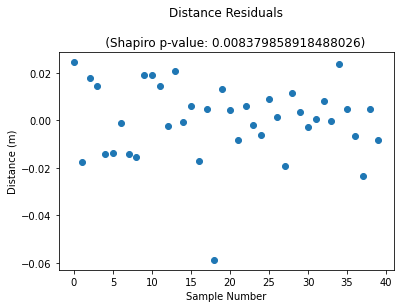

In [204]:
plt.title('Distance Residuals\n\n \
    (Shapiro p-value: ' + str(stats.shapiro(dist_model.resid)[1]) + ')')
plt.xlabel('Sample Number')
plt.ylabel('Distance (m)')
plt.scatter(range(len(dist_model.resid)), dist_model.resid)
plt.savefig('Pre_Dist_residuals',bbox_inches='tight')

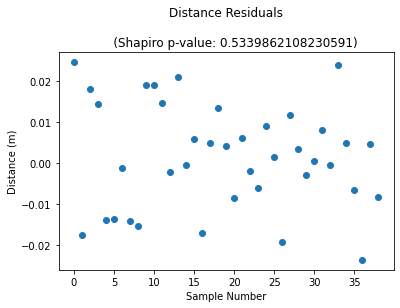

In [205]:
residuals_without_outlier = model.resid[:18].append(model.resid[19:])
plt.title('Distance Residuals\n\n \
    (Shapiro p-value: ' + str(stats.shapiro(residuals_without_outlier)[1]) + ')')
plt.xlabel('Sample Number')
plt.ylabel('Distance (m)')
plt.scatter(range(len(model.resid)-1), residuals_without_outlier)
plt.savefig('Post_Dist_residuals',bbox_inches='tight')

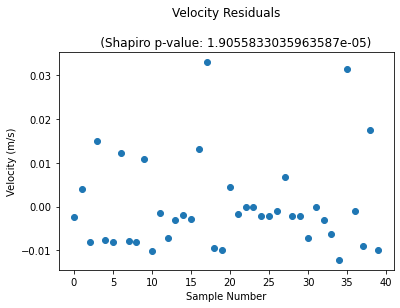

In [206]:
plt.title('Velocity Residuals\n\n \
    (Shapiro p-value: ' + str(stats.shapiro(velocity_model.resid)[1]) + ')')
plt.xlabel('Sample Number')
plt.ylabel('Velocity (m/s)')
plt.scatter(range(len(velocity_model.resid)), velocity_model.resid)
plt.savefig('Pre1_Velocity_Residuals',bbox_inches='tight')


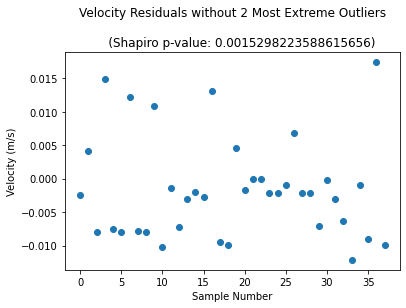

In [207]:
mod_vel_residuals = velocity_model.resid[:17].append(velocity_model.resid[18:35])\
    .append(velocity_model.resid[36:]) #+ velocity
#mod_vel_residuals = velocity_model.resid[:17].append(velocity_model.resid[18:])
plt.scatter(range(len(mod_vel_residuals)), mod_vel_residuals)
plt.title('Velocity Residuals without 2 Most Extreme Outliers\n\n \
    (Shapiro p-value: ' + str(stats.shapiro(mod_vel_residuals)[1]) + ')')
plt.xlabel('Sample Number')
plt.ylabel('Velocity (m/s)')
stats.shapiro(mod_vel_residuals)
plt.savefig('Pre2_Velocity_Residuals',bbox_inches='tight')

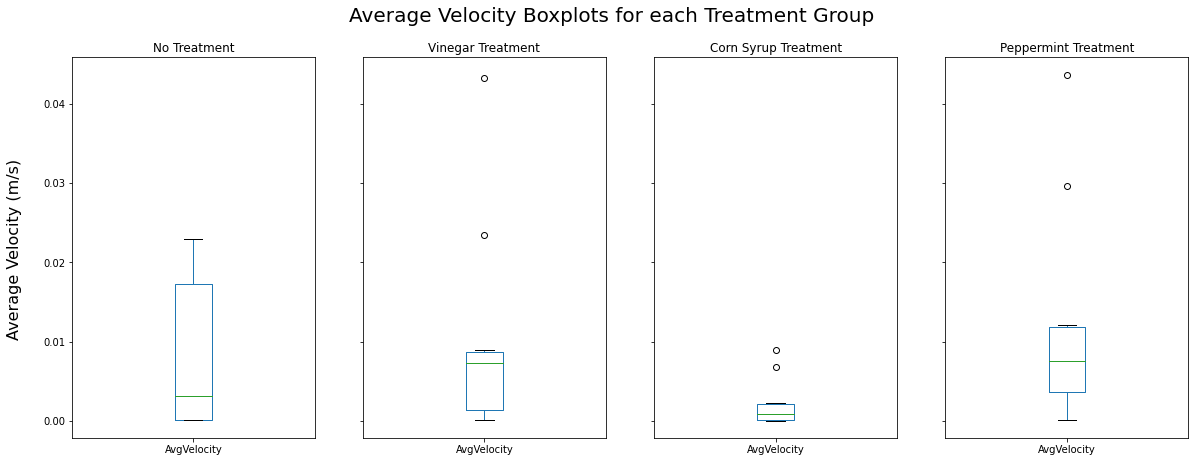

In [208]:
fig, ax = plt.subplots(1,4,figsize=(20,7),sharey=True)
avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'nothing'].plot.box(ax=ax[0], title='No Treatment')
avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'vinegar'].plot.box(ax=ax[1], title='Vinegar Treatment')
avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'corn'].plot.box(ax=ax[2], title='Corn Syrup Treatment')
avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'mint'].plot.box(ax=ax[3], title='Peppermint Treatment')
fig.text(0.08, 0.5, 'Average Velocity (m/s)', va='center', rotation='vertical',fontsize=16)
plt.suptitle('Average Velocity Boxplots for each Treatment Group',fontsize=20)
plt.savefig('Pre_Velocity_Boxplot',bbox_inches='tight')

In [175]:
avgs_table_test['AvgLogVelocity'] = np.log(avgs_table_test['AvgVelocity'])

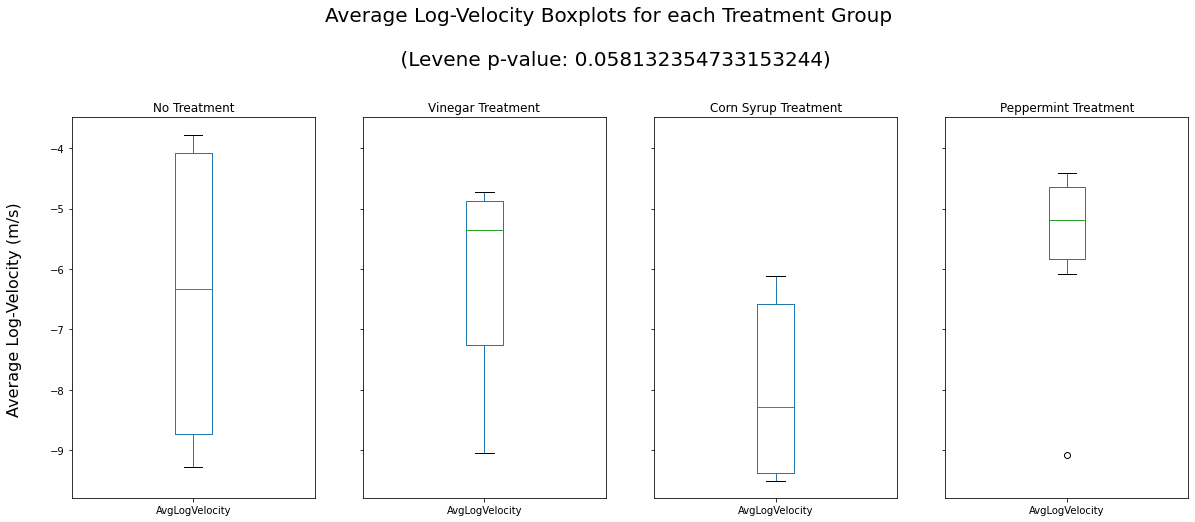

In [209]:
dist_levene = stats.levene(avgs_table_test['AvgLogVelocity'][avgs_table_test['Treatment'] == 'nothing'],
               avgs_table_test['AvgLogVelocity'][avgs_table_test['Treatment'] == 'vinegar'],
               avgs_table_test['AvgLogVelocity'][avgs_table_test['Treatment'] == 'corn'],
               avgs_table_test['AvgLogVelocity'][avgs_table_test['Treatment'] == 'mint'])

fig, ax = plt.subplots(1,4,figsize=(20,7),sharey=True)
avgs_table_test['AvgLogVelocity'][avgs_table_test['Treatment'] == 'nothing'].plot.box(ax=ax[0], title='No Treatment')
avgs_table_test['AvgLogVelocity'][avgs_table_test['Treatment'] == 'vinegar'].plot.box(ax=ax[1], title='Vinegar Treatment')
avgs_table_test['AvgLogVelocity'][avgs_table_test['Treatment'] == 'corn'].plot.box(ax=ax[2], title='Corn Syrup Treatment')
avgs_table_test['AvgLogVelocity'][avgs_table_test['Treatment'] == 'mint'].plot.box(ax=ax[3], title='Peppermint Treatment')
fig.text(0.08, 0.5, 'Average Log-Velocity (m/s)', va='center', rotation='vertical',fontsize=16)
plt.suptitle('Average Log-Velocity Boxplots for each Treatment Group \n\n (Levene p-value: ' + \
             str(dist_levene[1]) + ')',fontsize=20, y=1.1)
plt.savefig('Post_Log_Velocity_Boxplot',bbox_inches='tight')

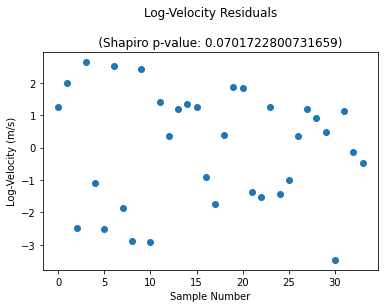

In [210]:
log_velocity_model_test = ols('AvgLogVelocity ~ C(Treatment)', data = avgs_table_test).fit()
plt.title('Log-Velocity Residuals\n\n \
    (Shapiro p-value: ' + str(stats.shapiro(log_velocity_model_test.resid)[1]) + ')')
plt.xlabel('Sample Number')
plt.ylabel('Log-Velocity (m/s)')
plt.scatter(range(len(log_velocity_model_test.resid)), log_velocity_model_test.resid)
plt.savefig('Log_Velocity_Residuals',bbox_inches='tight')

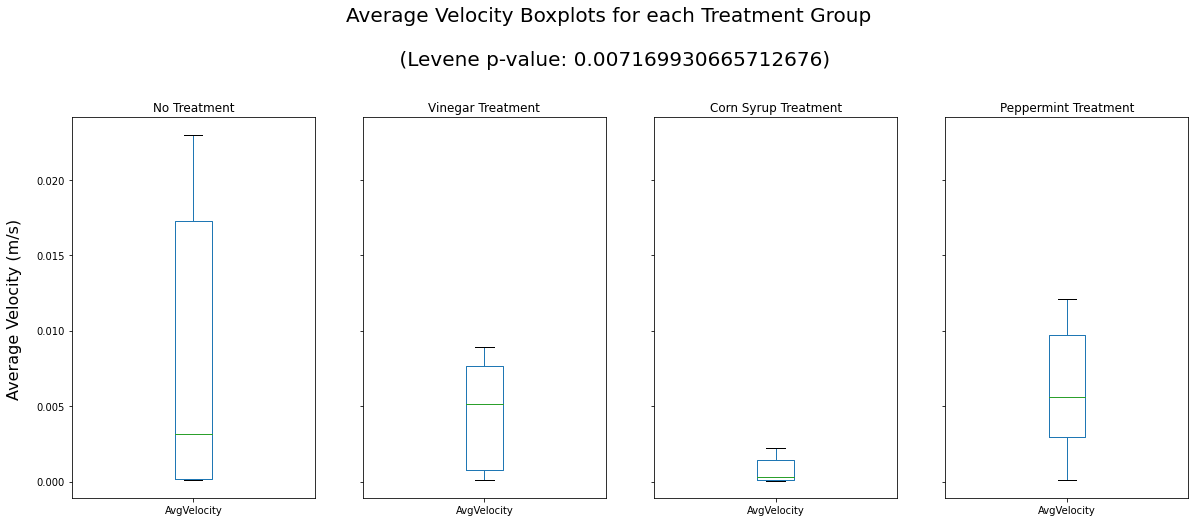

In [211]:
dist_levene = stats.levene(avgs_table_test['AvgVelocity'][avgs_table_test['Treatment'] == 'nothing'],
               avgs_table_test['AvgVelocity'][avgs_table_test['Treatment'] == 'vinegar'],
               avgs_table_test['AvgVelocity'][avgs_table_test['Treatment'] == 'corn'],
               avgs_table_test['AvgVelocity'][avgs_table_test['Treatment'] == 'mint'])

fig, ax = plt.subplots(1,4,figsize=(20,7),sharey=True)
avgs_table_test['AvgVelocity'][avgs_table_test['Treatment'] == 'nothing'].plot.box(ax=ax[0], title='No Treatment')
avgs_table_test['AvgVelocity'][avgs_table_test['Treatment'] == 'vinegar'].plot.box(ax=ax[1], title='Vinegar Treatment')
avgs_table_test['AvgVelocity'][avgs_table_test['Treatment'] == 'corn'].plot.box(ax=ax[2], title='Corn Syrup Treatment')
avgs_table_test['AvgVelocity'][avgs_table_test['Treatment'] == 'mint'].plot.box(ax=ax[3], title='Peppermint Treatment')
fig.text(0.08, 0.5, 'Average Velocity (m/s)', va='center', rotation='vertical',fontsize=16)
plt.suptitle('Average Velocity Boxplots for each Treatment Group \n\n (Levene p-value: ' + \
             str(dist_levene[1]) + ')',fontsize=20, y=1.1)
plt.savefig('Post_Velocity_Boxplot',bbox_inches='tight')

In [97]:
from matplotlib.cbook import boxplot_stats  
avgs_table_test = avgs_table.copy()
treatments = ['nothing', 'corn','vinegar','mint']
indexes_to_delete = []
for treatment_idx in range(4):
    treatment = treatments[treatment_idx]
    curr_series = avgs_table_test['AvgVelocity'][avgs_table['Treatment'] == treatment]
    outliers = boxplot_stats(curr_series).pop(0)['fliers']
    for outlier in outliers:
        index = curr_series[curr_series == outlier].index[0]
        indexes_to_delete.append(index)
        #curr_series.drop(index,inplace=True)
avgs_table_test.drop(indexes_to_delete,inplace=True)

#avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'vinegar'] = , outliers#.drop(outlierss

<AxesSubplot:title={'center':'Peppermint Treatment'}>

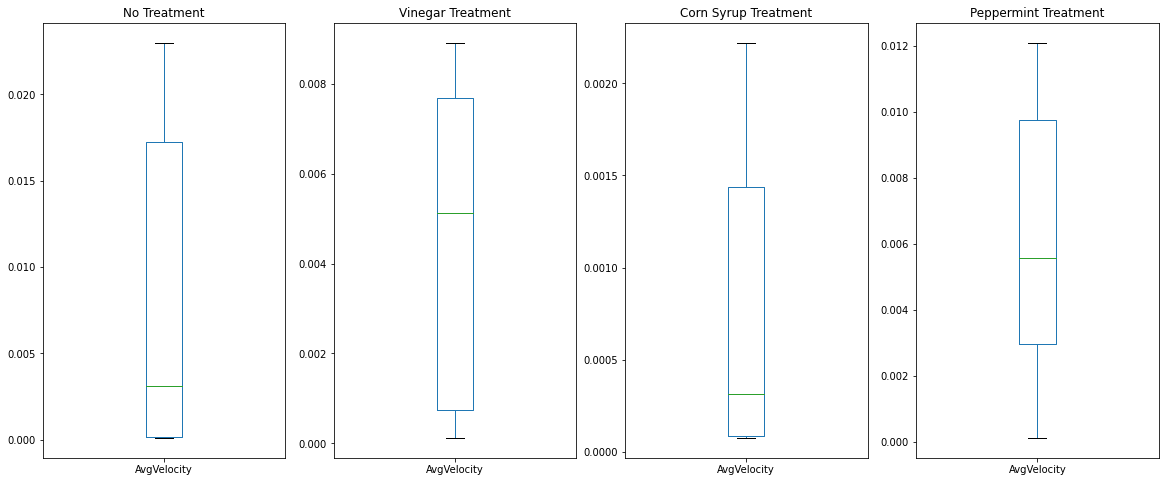

In [99]:
fig, ax = plt.subplots(1,4,figsize=(20,8))
avgs_table_test['AvgVelocity'][avgs_table['Treatment'] == 'nothing'].plot.box(ax=ax[0], title='No Treatment')
avgs_table_test['AvgVelocity'][avgs_table['Treatment'] == 'vinegar'].plot.box(ax=ax[1], title='Vinegar Treatment')
avgs_table_test['AvgVelocity'][avgs_table['Treatment'] == 'corn'].plot.box(ax=ax[2], title='Corn Syrup Treatment')
avgs_table_test['AvgVelocity'][avgs_table['Treatment'] == 'mint'].plot.box(ax=ax[3], title='Peppermint Treatment')

In [100]:
velocity_model_test = ols('AvgVelocity ~ C(Treatment)', data = avgs_table_test).fit()

In [101]:
stats.shapiro(velocity_model_test.resid)

ShapiroResult(statistic=0.9443974494934082, pvalue=0.08341491967439651)

In [152]:
stats.levene(avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'nothing'],
               avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'vinegar'],
               avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'corn'],
               avgs_table['AvgVelocity'][avgs_table['Treatment'] == 'mint'])

LeveneResult(statistic=1.303441295575754, pvalue=0.28825392720497434)

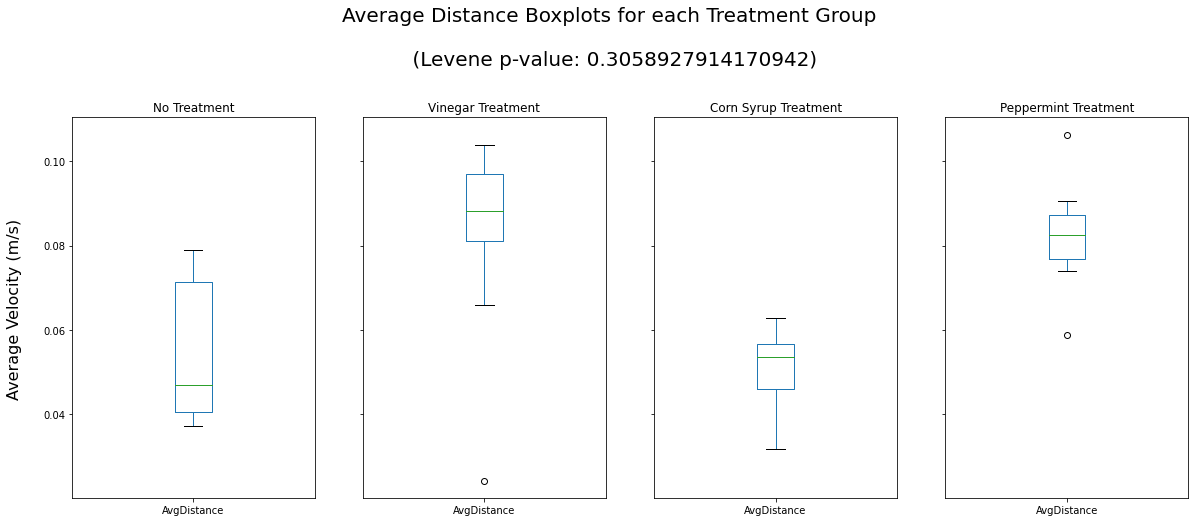

In [215]:
dist_levene = stats.levene(avgs_table['AvgDistance'][avgs_table['Treatment'] == 'nothing'],
               avgs_table['AvgDistance'][avgs_table['Treatment'] == 'vinegar'],
               avgs_table['AvgDistance'][avgs_table['Treatment'] == 'corn'],
               avgs_table['AvgDistance'][avgs_table['Treatment'] == 'mint'])
fig, ax = plt.subplots(1,4,figsize=(20,7),sharey=True)
avgs_table['AvgDistance'][avgs_table['Treatment'] == 'nothing'].plot.box(ax=ax[0], title='No Treatment')
avgs_table['AvgDistance'][avgs_table['Treatment'] == 'vinegar'].plot.box(ax=ax[1], title='Vinegar Treatment')
avgs_table['AvgDistance'][avgs_table['Treatment'] == 'corn'].plot.box(ax=ax[2], title='Corn Syrup Treatment')
avgs_table['AvgDistance'][avgs_table['Treatment'] == 'mint'].plot.box(ax=ax[3], title='Peppermint Treatment')
fig.text(0.08, 0.5, 'Average Velocity (m/s)', va='center', rotation='vertical',fontsize=16)
plt.suptitle('Average Distance Boxplots for each Treatment Group \n\n (Levene p-value: ' + \
             str(dist_levene[1]) + ')',fontsize=20, y=1.1)
plt.savefig('Pre_Distance_Boxplot', bbox_inches='tight')

In [185]:
stats.f_oneway(avgs_table_test['AvgLogVelocity'][avgs_table['Treatment'] == 'nothing'],
               avgs_table_test['AvgLogVelocity'][avgs_table['Treatment'] == 'vinegar'],
               avgs_table_test['AvgLogVelocity'][avgs_table['Treatment'] == 'corn'],
               avgs_table_test['AvgLogVelocity'][avgs_table['Treatment'] == 'mint'])

F_onewayResult(statistic=2.4686775880119516, pvalue=0.0811696219487534)

In [187]:
import scipy.stats as stats
#Distance anova
stats.f_oneway(avgs_table['AvgDistance'][avgs_table['Treatment'] == 'nothing'],
               avgs_table['AvgDistance'][avgs_table['Treatment'] == 'vinegar'],
               avgs_table['AvgDistance'][avgs_table['Treatment'] == 'corn'],
               avgs_table['AvgDistance'][avgs_table['Treatment'] == 'mint'])

F_onewayResult(statistic=11.10776086717551, pvalue=2.6266534764537816e-05)

In [190]:
avgs_table.dtypes

Treatment       object
AvgDistance    float64
AvgVelocity    float64
dtype: object

In [196]:
import statsmodels.stats.multicomp as mc
distance_comp = mc.MultiComparison(avgs_table['AvgDistance'], avgs_table['Treatment'])
post_hoc_res = distance_comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
corn,mint,0.0313,0.001,0.0115,0.0511,True
corn,nothing,0.0033,0.9,-0.0165,0.0231,False
corn,vinegar,0.0318,0.001,0.012,0.0516,True
mint,nothing,-0.028,0.0028,-0.0478,-0.0082,True
mint,vinegar,0.0005,0.9,-0.0193,0.0203,False
nothing,vinegar,0.0285,0.0024,0.0087,0.0483,True


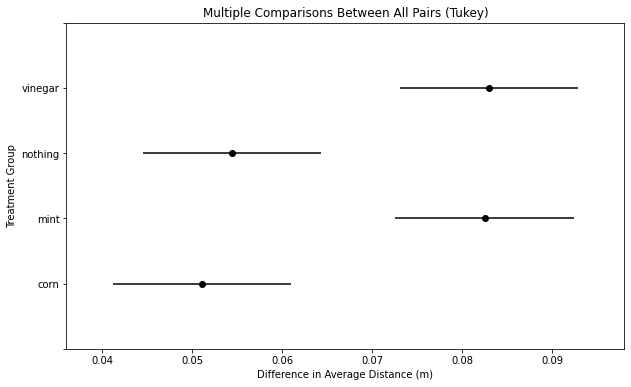

In [199]:
post_hoc_res.plot_simultaneous(ylabel= "Treatment Group", xlabel= "Difference in Average Distance (m)")
plt.savefig('Tukey Plot')